# Modeling and Polynomial Least-Squares Fit

## adapted from Rorres and Anton, <i>Applications of Linear Algebra, 3e</i> , 1984. pp 201-4.

<div style="border:2px solid black;">
<p></p>

$\textit{ Let us attempt to fit a polynomial of fixed degree}$ m
<p></p>
<center>
<i>y = $a_0 + a_1x + ... + a_mx^{m}$ </i>
</center>

<p></p>

$\textit{ to n points ($x_1$, $y_1$), ($x_2$, $y_2$), ..., ($x_n$, $y_n$).}$

<p></p>

$\textit{ Substituting these }$ n $\textit{values of }$ x $\textit{and}$ y $\textit{into}$

<p></p>
<center>
<i>y = $a_0 + a_1x + ... + a_mx^{m}$ </i>
</center>

$\textit{ yields the }$ n $\textit{equations}$

<center>
$\begin{bmatrix} y_1\\y_2\\...\\y_n \end{bmatrix}$ = 
$\begin{bmatrix} 1&x_1&x_1^{2}&...&x_1^{m} \\ 1&x_2&x_2^{2}&...&x_2^{m} \\ ... \\ 1&x_n&x_n^{2}&...&x_n^{m} \end{bmatrix}$
$\begin{bmatrix} a_0\\a_1\\...\\a_m \end{bmatrix}$, 
</center>

$\textit{ or, more simply, }$

<p></p>
<center>
<b>y</b> = <i>M</i> <b>v</b> ,
</center>

<p></p>
$\textit{ where}$

<center>
<b>y</b> = $\begin{bmatrix} y_1\\y_2\\...\\y_n \end{bmatrix}$ ,
<i>M</i> = $\begin{bmatrix} 1&x_1&x_1^{2}&...&x_1^{m} \\ 1&x_2&x_2^{2}&...&x_2^{m} \\ ... \\ 1&x_n&x_n^{2}&...&x_n^{m} \end{bmatrix}$ , 
<b>v</b> = $\begin{bmatrix} a_0\\a_1\\...\\a_m \end{bmatrix}$ . 
</center>
<p></p>

$\textit{ Exactly as before, it can be shown that the least squares solution for}$ <b>v</b> $\textit{is given by}$
<p></p>

<center>
$\textbf{v} \textit{= $(M^{T}M)^-1 M^{T}$} \textbf{y}$
</center>
<p></p>

$\textit{ which determines the coefficients of the polynomial.}$
<p></p>
</div>

<p>EXAMPLE. From Theorem II Proposition II in Chapter III of Galileo's <i>The Two Sciences</i>, one can derive the fundamental modern equation that yields the vertical displacement for falling bodies: </p>
<p></p>
<center>
$\textit{s = $s_0$ + $v_0t$ + $\frac{1}{2}gt^{2}$}$
</center>
<p>where</p>
<p>$s$ = vertical displacement downward relative to some point body occupies at time t = 0;</p>
<p>$s_0$ = initial displacement at time t = 0;</p>
<p>$v_0$ = initial velocity at time t = 0;</p>
<p>$g$ = acceleration from gravity</p>
<p></p>
<p>In a college physics lab, students drop weights with unknown initial displacements and velocity; and in tenths of a second, lab hardware records the vertical displacements (s) of the weights.
 One student finds that at times t = .1, .2, .3, .4, and .5 seconds, her weight has fallen s = -0.18, 0.31, 1.03, 2.48, and 3.73 feet, respectively, from the height she let it go.
 Find the initial displacement and initial velocity of the weight, as well as an approximate value of <i>g</i> from the data.</p>

## sympy approach

In [77]:
from sympy import init_session
init_session()

IPython console for SymPy 1.8 (Python 3.9.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.8/



In [78]:
M = Matrix([1, .1, .01, 1, .2, .04, 1, .3, .09, 1, .4, .16, 1, .5, .25]).reshape(5, 3)
M

/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/user/miniconda/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecation

⎡1  0.1  0.01⎤
⎢            ⎥
⎢1  0.2  0.04⎥
⎢            ⎥
⎢1  0.3  0.09⎥
⎢            ⎥
⎢1  0.4  0.16⎥
⎢            ⎥
⎣1  0.5  0.25⎦

In [79]:
A = M.transpose() * M
A

⎡ 5     1.5    0.55 ⎤
⎢                   ⎥
⎢1.5   0.55   0.225 ⎥
⎢                   ⎥
⎣0.55  0.225  0.0979⎦

In [80]:
A.inv()

⎡4.59999999999998   -32.9999999999998  49.9999999999997 ⎤
⎢                                                       ⎥
⎢-32.9999999999998  267.142857142856   -428.571428571426⎥
⎢                                                       ⎥
⎣49.9999999999997   -428.571428571426  714.285714285711 ⎦

In [81]:
# we want to round all floats. we can do this using lambdas to determine which values are floats,
# then round those that are
expr = A.inv()
from sympy.core.rules import Transform
expr.xreplace(Transform(lambda x: x.round(2), lambda x: isinstance(x, Float)))

⎡ 4.6    -33.0    50.0  ⎤
⎢                       ⎥
⎢-33.0  267.14   -428.57⎥
⎢                       ⎥
⎣50.0   -428.57  714.29 ⎦

In [103]:
# we also want to round the final values in our output column vector
expr = A.inv() * M.transpose() * Matrix([.05, .20, .44, .79, 1.23])
from sympy.core.rules import Transform
expr.xreplace(Transform(lambda x: x.round(2), lambda x: isinstance(x, Float)))

⎡ 0.0  ⎤
⎢      ⎥
⎢-0.e-2⎥
⎢      ⎥
⎣ 4.93 ⎦

## numpy approach

In [105]:
import numpy as np

In [106]:
M = np.array([1, .1, .01, 1, .2, .04, 1, .3, .09, 1, .4, .16, 1, .5, .25]).reshape(5, 3)
M

array([[1.  , 0.1 , 0.01],
       [1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25]])

In [107]:
A = np.dot(M.T, M)
A

array([[5.    , 1.5   , 0.55  ],
       [1.5   , 0.55  , 0.225 ],
       [0.55  , 0.225 , 0.0979]])

In [108]:
np.linalg.inv(A)

array([[   4.6       ,  -33.        ,   50.        ],
       [ -33.        ,  267.14285714, -428.57142857],
       [  50.        , -428.57142857,  714.28571429]])

In [109]:
np.dot(np.dot(np.linalg.inv(A), M.T), np.array([.05, .20, .44, .79, 1.23]))

array([ 2.00000000e-03, -7.14285714e-03,  4.92857143e+00])

# scipy approach

In [110]:
from scipy import optimize

In [112]:
x = [.1, .2, .3, .4, .5]
y = [.05, .20, .44, .79, 1.23] # observed data
def f_(x, s0, v0, g): # we put the x-array first
    return s0 + v0*x + (1/2)*g*x**2


In [113]:
popt, pcov = optimize.curve_fit(f_, x, y) # we need a general curve-fitting function

In [114]:
popt # we read the optimal parameters in the order of the function's parameters (above), as: s0, v0, and g

array([ 1.99999265e-03, -7.14279878e-03,  9.85714267e+00])

In [115]:
pcov # estimated covariance of popt.

array([[ 5.25715644e-05, -3.77144373e-04,  1.14286465e-03],
       [-3.77144373e-04,  3.05307695e-03, -9.79599014e-03],
       [ 1.14286465e-03, -9.79599014e-03,  3.26533596e-02]])

## matplotlib plot

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

In [117]:
x = np.array([.1, .2, .3, .4, .5])

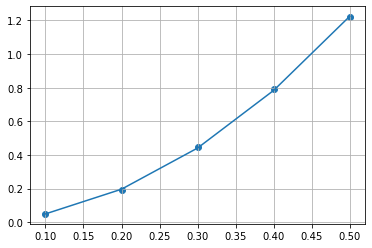

In [118]:
s_0, v_0, g = 0., 0.0, 9.8
y = s_0 + v_0*x + (1/2)*g*x**2
plt.plot(x, y)
y = [.05, .19, .45, .79, 1.22]
plt.scatter(x, y)
#plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()